# Assignment Expectations/Steps -


Import and store the data in a data frame. (2.5 points)

Remove the outliers from the data (5 points)

Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

Print the coefficients & intercepts of the linear regression model (5 points)

Print the accuracy of the overall model (2.5 points)

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat
Dataset:   airq402.dat

Source: U.S. Department of Transportation

Description: Airfsres and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

Variables/Columns

City1   1-3
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-75

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import and store the data in a data frame. (2.5 points)

In [2]:
airfare_columns = np.array(['City1', 'City2', 'Average_Fare','Distance', 'Avg_wk_passengers', 'Mkt_ldg_airline', 'Mkt_share', 'Avg_fare', 'Low_price_airline', 'Market_share', 'Price'], dtype='<U19')
airfare_columns

array(['City1', 'City2', 'Average_Fare', 'Distance', 'Avg_wk_passengers',
       'Mkt_ldg_airline', 'Mkt_share', 'Avg_fare', 'Low_price_airline',
       'Market_share', 'Price'], dtype='<U19')

In [3]:
airfare_df = pd.read_fwf('http://www.stat.ufl.edu/~winner/data/airq402.dat', header=None, names=airfare_columns)

In [4]:

print (airfare_df.shape)
airfare_df

(1000, 11)


,City1,City2,Average_Fare,Distance,Avg_wk_passengers,Mkt_ldg_airline,Mkt_share,Avg_fare,Low_price_airline,Market_share,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# Remove the outliers from the data (5 points)

In [ ]:
#airfare_df.isna()

In [5]:
print (airfare_df.dtypes)
airfare_df.head()

City1                 object
City2                 object
Average_Fare         float64
Distance               int64
Avg_wk_passengers    float64
Mkt_ldg_airline       object
Mkt_share            float64
Avg_fare             float64
Low_price_airline     object
Market_share         float64
Price                float64
dtype: object


,City1,City2,Average_Fare,Distance,Avg_wk_passengers,Mkt_ldg_airline,Mkt_share,Avg_fare,Low_price_airline,Market_share,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [6]:
airfare_df.describe()

,Average_Fare,Distance,Avg_wk_passengers,Mkt_share,Avg_fare,Market_share,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [7]:
Q1 = airfare_df.quantile(0.25)
Q3 = airfare_df.quantile(0.75)
IQR = Q3 - Q1
IQR

Average_Fare          71.4175
Distance             899.0000
Avg_wk_passengers    512.7150
Mkt_share             27.0000
Avg_fare              78.8925
Market_share          39.7775
Price                 54.7625
dtype: float64

In [ ]:
#airfare_df

In [13]:
#print(airfare_df < (Q1 - 1.5 * IQR)) |(airfare_df > (Q3 + 1.5 * IQR))
airfare_df_out=airfare_df[~((airfare_df< (Q1 - 1.5 * IQR)) |(airfare_df> (Q3 + 1.5 * IQR))).any(axis=1)]

airfare_df_out.shape

(885, 11)

### Q3: Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [24]:
print (airfare_df_out.head())

y = airfare_df_out['Average_Fare']
print (y.head())
print (y.shape)


  City1 City2  Average_Fare  Distance  Avg_wk_passengers Mkt_ldg_airline  \
0   CAK   ATL        114.47       528             424.56              FL   
1   CAK   MCO        122.47       860             276.84              FL   
2   ALB   ATL        214.42       852             215.76              DL   
3   ALB   BWI         69.40       288             606.84              WN   
4   ALB   ORD        158.13       723             313.04              UA   

   Mkt_share  Avg_fare Low_price_airline  Market_share   Price  
0      70.19    111.03                FL         70.19  111.03  
1      75.10    123.09                DL         17.23  118.94  
2      78.89    223.98                CO          2.77  167.12  
3      96.97     68.86                WN         96.97   68.86  
4      39.79    161.36                WN         15.34  145.42  
0    114.47
1    122.47
2    214.42
3     69.40
4    158.13
Name: Average_Fare, dtype: float64
(885,)


In [28]:

X = airfare_df_out.drop(['Average_Fare'], axis=1)


print (X.shape)
print (X.head())

(885, 10)
  City1 City2  Distance  Avg_wk_passengers Mkt_ldg_airline  Mkt_share  \
0   CAK   ATL       528             424.56              FL      70.19   
1   CAK   MCO       860             276.84              FL      75.10   
2   ALB   ATL       852             215.76              DL      78.89   
3   ALB   BWI       288             606.84              WN      96.97   
4   ALB   ORD       723             313.04              UA      39.79   

   Avg_fare Low_price_airline  Market_share   Price  
0    111.03                FL         70.19  111.03  
1    123.09                DL         17.23  118.94  
2    223.98                CO          2.77  167.12  
3     68.86                WN         96.97   68.86  
4    161.36                WN         15.34  145.42  


### Q4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [39]:
df_corr = airfare_df_out.corr()
df_corr

,Average_Fare,Distance,Avg_wk_passengers,Mkt_share,Avg_fare,Market_share,Price
Average_Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Avg_wk_passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
Mkt_share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Avg_fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
Market_share,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
Price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


### None of the Independent variables have a correlation less than 0.1.
I am assuming 0.1 as absolute value and hence not considering negative correlation as less than 0.1 
eg. Avg_wk_passengers correlation of -0.197 is considered as negative correlation, but greater than 0.1. 
If number of passengers increase, airfare will reduce. This also correlate with the airline industry understanding.

# Q5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

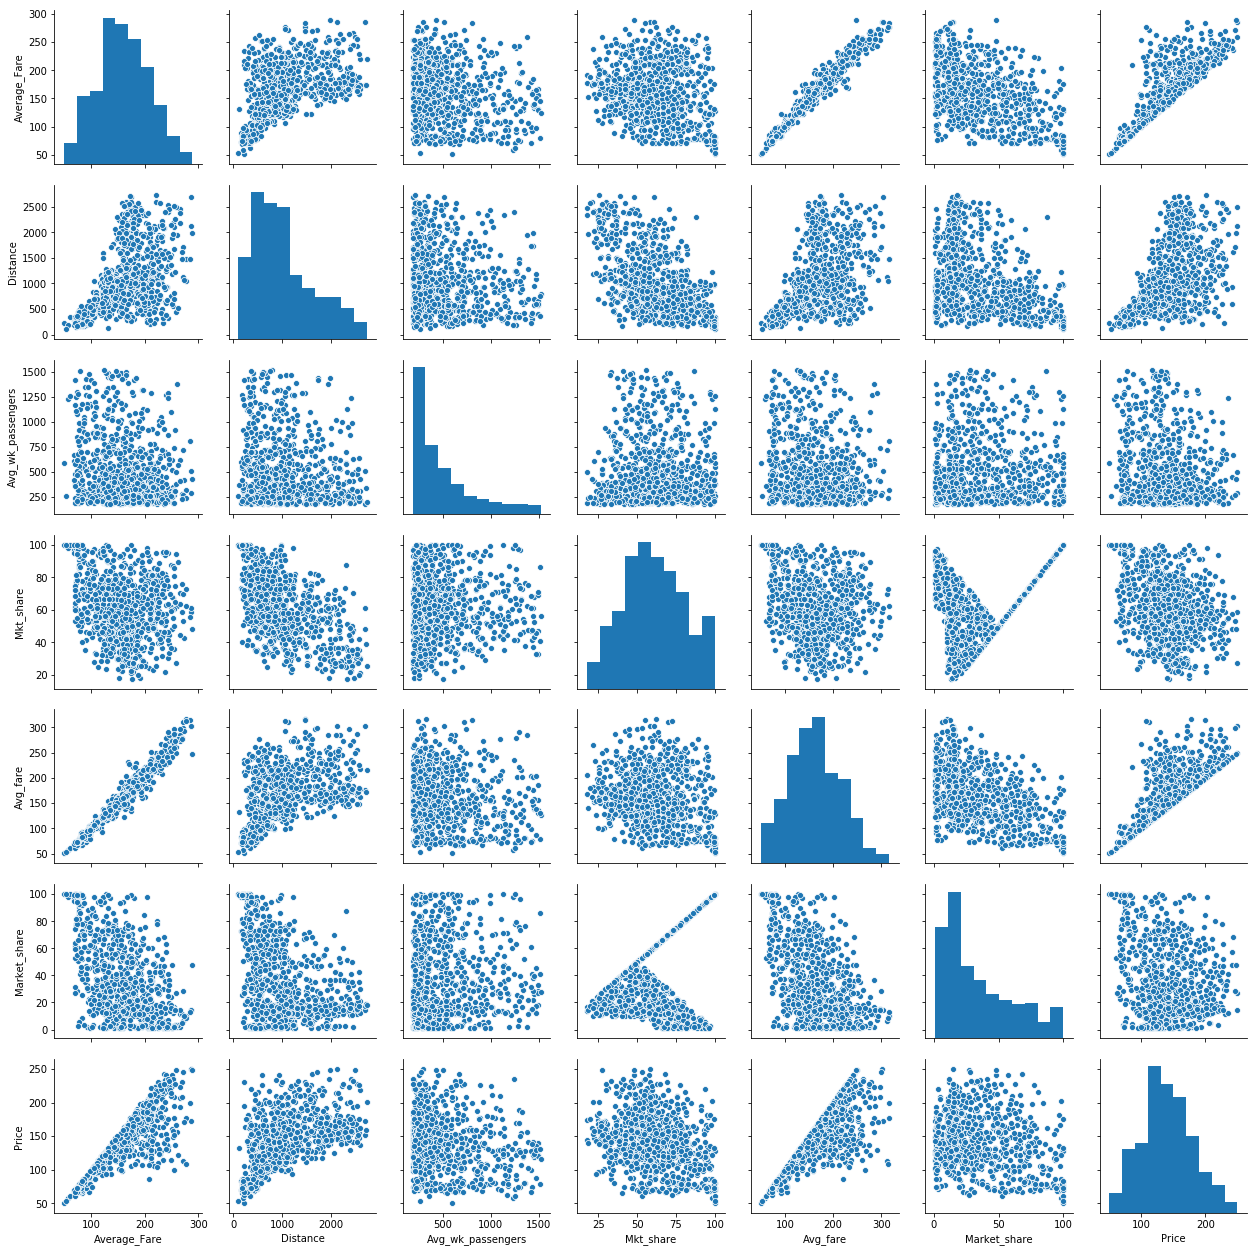

In [44]:
sns.pairplot (airfare_df_out)

#This provides scatter plot of all variables vs each other
#PLots in first row provides scatter plots for all variables vs Average_Fare (including self)
# We can see a good positive correlation with Avg_fare and Price
# Distance is also positive
# Other three are weak negative

# Q6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [49]:
print (X.shape)
print (y.shape)

(885, 10)
(885,)


In [59]:
# Update the categorical variables 
from sklearn.preprocessing import LabelEncoder

#identify object type variables
X.dtypes

col_object =X.dtypes==object
col_object_out =col_object.index[col_object==True]
col_object_out

#Transform the categorical variables
le = LabelEncoder()

for col in col_object_out:
    X[col]=le.fit_transform(X[col])
    
X.head()

,City1,City2,Distance,Avg_wk_passengers,Mkt_ldg_airline,Mkt_share,Avg_fare,Low_price_airline,Market_share,Price
0,16,0,528,424.56,6,70.19,111.03,7,70.19,111.03
1,16,40,860,276.84,6,75.10,123.09,5,17.23,118.94
2,2,0,852,215.76,4,78.89,223.98,4,2.77,167.12
3,2,7,288,606.84,14,96.97,68.86,16,96.97,68.86
4,2,52,723,313.04,12,39.79,161.36,16,15.34,145.42


In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print ('X train', X_train.shape)
print ('X test', X_test.shape)
print ('y train', y_train.shape)
print ('y test', y_test.shape)

X train (619, 10)
X test (266, 10)
y train (619,)
y test (266,)


In [61]:
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Q7. Print the coefficients & intercepts of the linear regression model (5 points)


In [69]:
print ('coefficients', lr.coef_)
lr.coef_

coefficients [ 0.02446793 -0.04011059  0.00320072 -0.0031109  -0.21537345  0.08748373
  0.7408106   0.06228478 -0.03929282  0.2081945 ]


array([ 0.02446793, -0.04011059,  0.00320072, -0.0031109 , -0.21537345,
        0.08748373,  0.7408106 ,  0.06228478, -0.03929282,  0.2081945 ])

In [66]:
print ('intercept', lr.intercept_)

intercept 7.112103096959856


In [75]:
colname = X.columns.array
colname

<PandasArray>
[            'City1',             'City2',          'Distance',
 'Avg_wk_passengers',   'Mkt_ldg_airline',         'Mkt_share',
          'Avg_fare', 'Low_price_airline',      'Market_share',
             'Price']
Length: 10, dtype: object

In [78]:
coeff = pd.DataFrame(lr.coef_, colname)
coeff

,0
City1,0.024468
City2,-0.040111
Distance,0.003201
Avg_wk_passengers,-0.003111
Mkt_ldg_airline,-0.215373
Mkt_share,0.087484
Avg_fare,0.740811
Low_price_airline,0.062285
Market_share,-0.039293
Price,0.208194


### Q8. Print the accuracy of the overall model (2.5 points)

In [80]:
lr.score(pd.DataFrame(X_train),pd.DataFrame(y_train))

0.972493667943058

In [81]:
lr.score(pd.DataFrame(X_test),pd.DataFrame(y_test))

0.973049789451405

In [ ]:
# Model Accuracy is high ~ 0.97. Accuracy with both training data and test data is high and similar to each other. 